In [1]:
import sqlite3

# Connect or create the database

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create a sample sales table

In [3]:
cursor.execute('''
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sample data

In [4]:
sales_data = [
    ('Laptop', 5, 50000),
    ('Mouse', 20, 500),
    ('Keyboard', 10, 1000),
    ('Monitor', 7, 12000),
    ('Headset', 15, 1500)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()

In [5]:
import pandas as pd

# Run SQL query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
print(df)


    product  total_qty   revenue
0   Headset         15   22500.0
1  Keyboard         10   10000.0
2    Laptop          5  250000.0
3   Monitor          7   84000.0
4     Mouse         20   10000.0


# Plot a Bar Chart

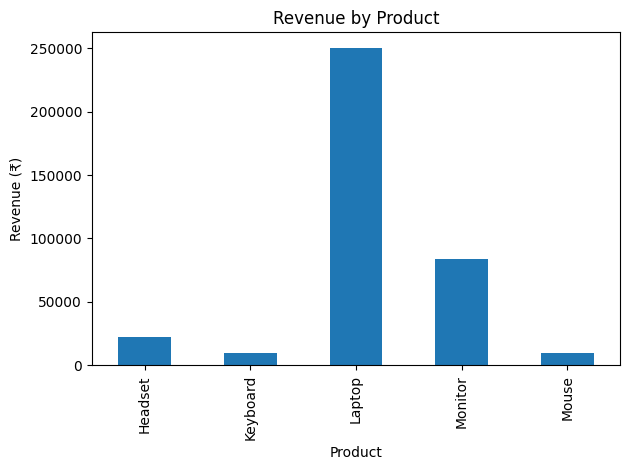

In [6]:
import matplotlib.pyplot as plt

# Plot Revenue by Product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
